In [26]:
# !ls -lha kaggle.json 
# !pip install -q kaggle
# !mkdir -p ~/.kaggle 
# !cp kaggle.json ~/.kaggle/
# !pwd
# !chmod 600 ~/.kaggle/kaggle.json
# !mkdir datasets
# !cd datasets
# !kaggle datasets download -d fmendes/fmendesdat263xdemos
# !ls
# !unzip *.zip
# !rm *.zip

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [31]:
df = exercise.merge(calories, on='User_ID')

In [32]:
# df.to_csv('exercice_calories.csv')

In [33]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


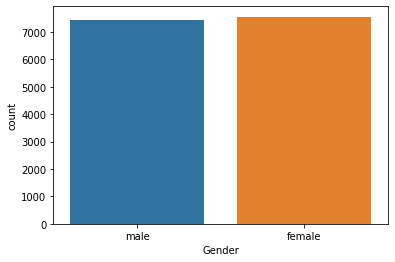

In [35]:
sns.countplot(data=df, x='Gender')

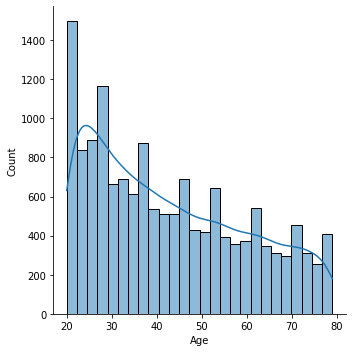

In [36]:
sns.displot(data=df, x='Age', kde=True)

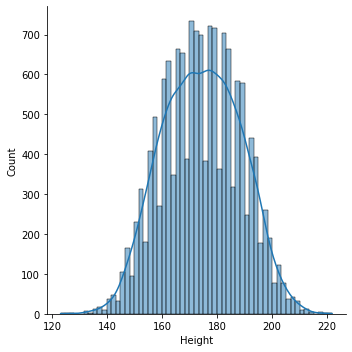

In [37]:
sns.displot(data=df, x='Height', kde=True)

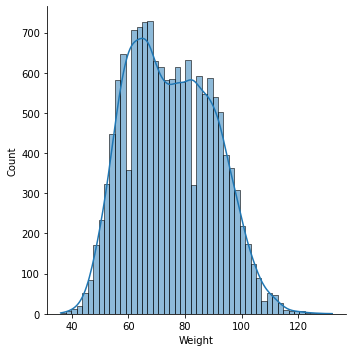

In [38]:
sns.displot(data=df, x='Weight', kde=True)

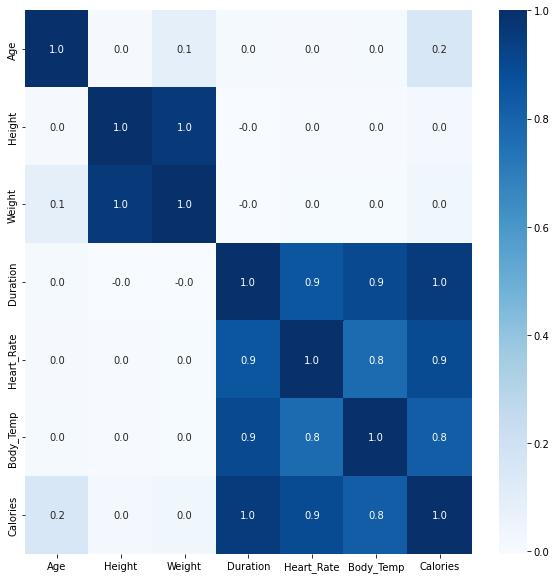

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.drop('User_ID', axis=1).corr(), cbar=True, fmt='.1f', annot=True, cmap='Blues')

In [40]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [41]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


preprocessor = make_column_transformer(
    [StandardScaler(), X_train.select_dtypes('number').columns],
    [OneHotEncoder(drop='first'), X_train.select_dtypes('object').columns],
)

In [49]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

In [52]:
model = make_pipeline(preprocessor, XGBRegressor(objective ='reg:squarederror'))

In [53]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender'], dtype='object'))])),
                ('xgbregressor', XGBRegressor(objective='reg:squarederror'))])

In [54]:
model.score(X_test, y_test)

0.9969046593005394